In [1]:
import matplotlib.pyplot as plt
import torch
import pandas as pd
import numpy as np
from tqdm import tqdm
from deeplatent import Corpus, GTM, generate_documents
from random import random

# ----- Simulate data -----

df_true_dist, df, topic_words, true_lambda, true_label_coeff = generate_documents(
    num_docs=10000,
    num_topics=2,
    vocab_size=500,
    num_covs=0,
    num_languages=2,
    doc_topic_prior='logistic_normal',
    min_words=100,
    max_words=100,
    random_seed=42
)

# ----- Corpus + GTM -----
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_lang1 = CountVectorizer()
vectorizer_lang1.fit(df["doc_clean_0"]) 

vectorizer_lang2 = CountVectorizer()
vectorizer_lang2.fit(df["doc_clean_1"]) 

modalities = {
    "lang1": {
        "column": "doc_clean_0",
        "views": {
            "bow": {
                "type": "bow",
                "vectorizer": vectorizer_lang1
            }
        }
    },
    "lang2": {
        "column": "doc_clean_1",
        "views": {
            "bow": {
                "type": "bow",
                "vectorizer": vectorizer_lang2
            }
        }
    }
}

train_dataset = Corpus(df, modalities=modalities)

encoder_args = {
    "lang1_bow": {
        "hidden_dims": [128,64],
        "activation": "relu",
        "bias": True,
        "dropout": 0.0
    },
    "lang2_bow": {
        "hidden_dims": [128,64],
        "activation": "relu",
        "bias": True,
        "dropout": 0.0
    }
}

decoder_args = {
    "lang1_bow": {
        "hidden_dims": [64,128],
        "activation": "relu",
        "bias": True,
        "dropout": 0.0
    },
    "lang2_bow": {
        "hidden_dims": [64,128],
        "activation": "relu",
        "bias": True,
        "dropout": 0.0
    }
}

tm = GTM(
    train_data=train_dataset,
    n_topics=2,
    doc_topic_prior="logistic_normal",
    return_best_model=True,
    encoder_args=encoder_args,
    decoder_args=decoder_args,
    print_every_n_steps=1000,
    num_steps = 10000
)

Step   1000	Mean Training Loss:9.3452492
Rec Loss:9.2031136
Divergence Loss:0.1421353
Pred Loss:0.0000000

Step   2000	Mean Training Loss:9.4085760
Rec Loss:9.2833424
Divergence Loss:0.1252337
Pred Loss:0.0000000

Step   3000	Mean Training Loss:9.2320242
Rec Loss:9.1599808
Divergence Loss:0.0720437
Pred Loss:0.0000000

Step   4000	Mean Training Loss:9.3438873
Rec Loss:9.2599621
Divergence Loss:0.0839248
Pred Loss:0.0000000

Step   5000	Mean Training Loss:9.3917341
Rec Loss:9.2737856
Divergence Loss:0.1179486
Pred Loss:0.0000000

Step   6000	Mean Training Loss:9.2836962
Rec Loss:9.2193565
Divergence Loss:0.0643397
Pred Loss:0.0000000

Step   7000	Mean Training Loss:9.3516159
Rec Loss:9.2970867
Divergence Loss:0.0545295
Pred Loss:0.0000000

Step   8000	Mean Training Loss:9.3235006
Rec Loss:9.2625275
Divergence Loss:0.0609733
Pred Loss:0.0000000

Step   9000	Mean Training Loss:9.2800064
Rec Loss:9.2153273
Divergence Loss:0.0646795
Pred Loss:0.0000000

Step  10000	Mean Training Loss:9.3406

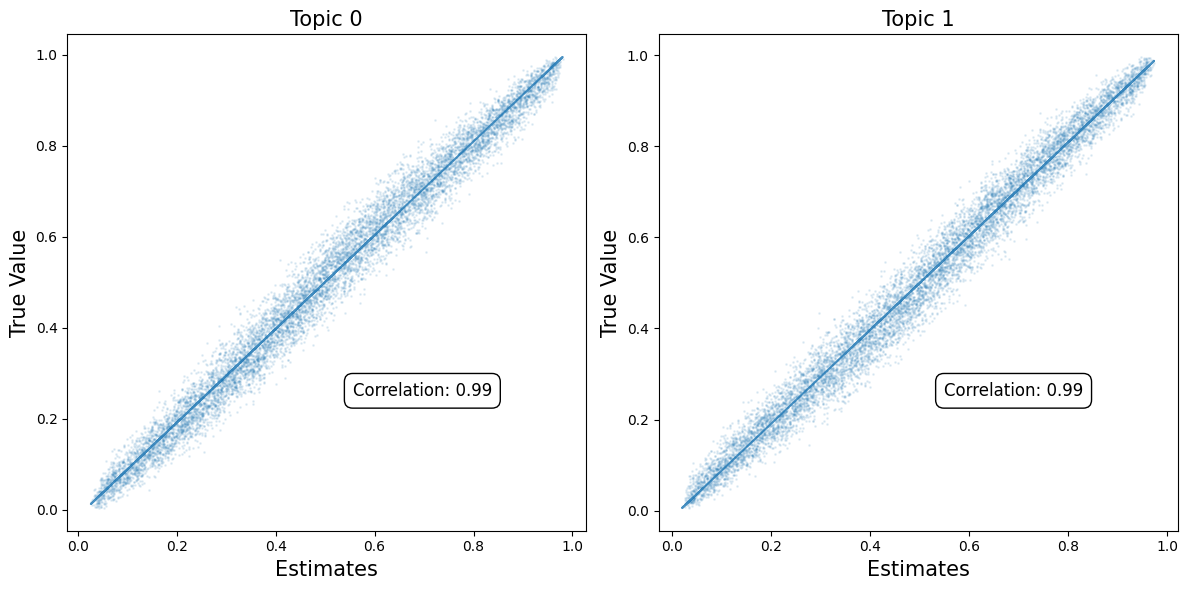

In [2]:
estimated_doc_topics = tm.get_doc_topic_distribution(train_dataset, num_samples=30)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for i in range(2):  
    x = estimated_doc_topics[:, i]  
    y = df_true_dist['Topic{}'.format(i)]
    
    axs[i].scatter(x, y, s=1, alpha=0.1)
    
    coefficients = np.polyfit(x, y, 1)
    fit = np.poly1d(coefficients)
    axs[i].plot(x, fit(x), alpha=0.8)
    
    axs[i].set_xlabel('Estimates', fontsize=15)
    axs[i].set_ylabel('True Value', fontsize=15)
    axs[i].set_title(f'Topic {i}', fontsize=15)

    corr_coeff = np.corrcoef(x, y)[0, 1]
    axs[i].annotate(f'Correlation: {corr_coeff:.2f}', xy=(0.55, 0.3), xycoords='axes fraction',
                    fontsize=12, verticalalignment='top', horizontalalignment='left',
                    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()

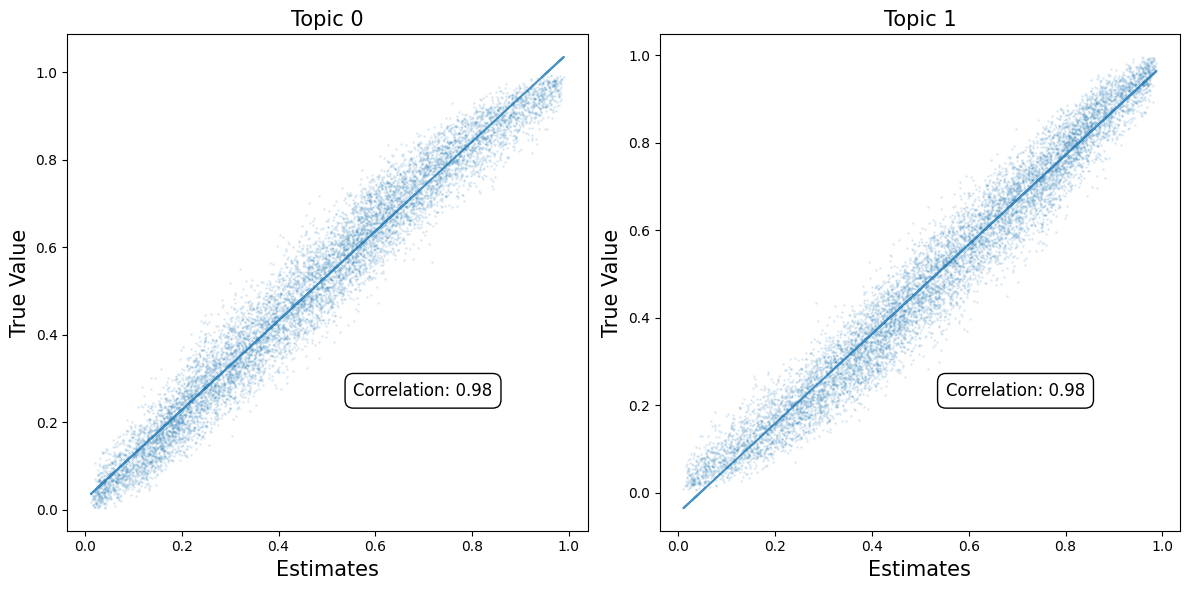

In [3]:
estimated_doc_topics = tm.get_doc_topic_distribution(train_dataset, single_modality="lang1_bow", num_samples=30)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for i in range(2):  
    x = estimated_doc_topics[:, i]  # or 1 - estimated_doc_topics[:, i] if that's your intention
    y = df_true_dist['Topic{}'.format(i)]
    
    axs[i].scatter(x, y, s=1, alpha=0.1)
    
    coefficients = np.polyfit(x, y, 1)
    fit = np.poly1d(coefficients)
    axs[i].plot(x, fit(x), alpha=0.8)
    
    axs[i].set_xlabel('Estimates', fontsize=15)
    axs[i].set_ylabel('True Value', fontsize=15)
    axs[i].set_title(f'Topic {i}', fontsize=15)

    corr_coeff = np.corrcoef(x, y)[0, 1]
    axs[i].annotate(f'Correlation: {corr_coeff:.2f}', xy=(0.55, 0.3), xycoords='axes fraction',
                    fontsize=12, verticalalignment='top', horizontalalignment='left',
                    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()

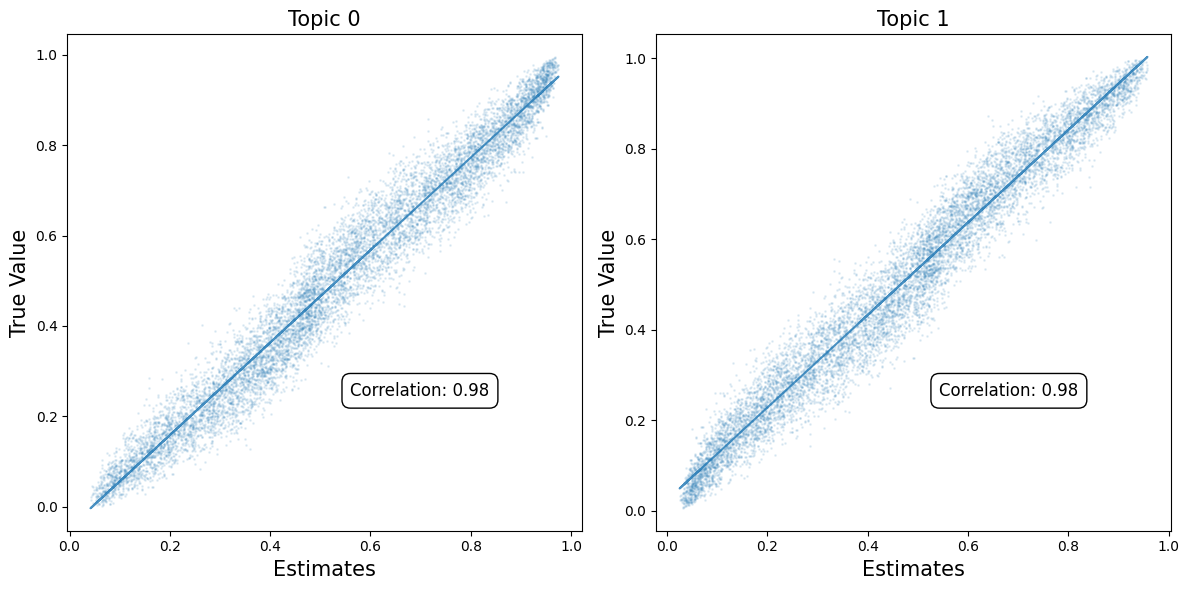

In [4]:
estimated_doc_topics = tm.get_doc_topic_distribution(train_dataset, single_modality="lang2_bow", num_samples=30)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for i in range(2):  
    x = estimated_doc_topics[:, i]  # or 1 - estimated_doc_topics[:, i] if that's your intention
    y = df_true_dist['Topic{}'.format(i)]
    
    axs[i].scatter(x, y, s=1, alpha=0.1)
    
    coefficients = np.polyfit(x, y, 1)
    fit = np.poly1d(coefficients)
    axs[i].plot(x, fit(x), alpha=0.8)
    
    axs[i].set_xlabel('Estimates', fontsize=15)
    axs[i].set_ylabel('True Value', fontsize=15)
    axs[i].set_title(f'Topic {i}', fontsize=15)

    corr_coeff = np.corrcoef(x, y)[0, 1]
    axs[i].annotate(f'Correlation: {corr_coeff:.2f}', xy=(0.55, 0.3), xycoords='axes fraction',
                    fontsize=12, verticalalignment='top', horizontalalignment='left',
                    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()